# KNN parameter search

Duncan Tulimieri

In [1]:
# import libraries 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16}) 
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import time 
import seaborn as sns
# personal classes
from ProcessData import ProcessForestData
import savingfigR as sf 

In [2]:
class pKNN(ProcessForestData):

    n_neighbors_options = np.arange(3, 30, 2)
    weights_options = ['uniform', 'distance']

    def __init__(self):
        # method calls 
        self.X_train, self.X_test, self.y_train, self.y_test = self.load_data(perform_scale=False, sub_data_section='')
        self.un_classifiers = np.unique(self.y_train)
        # Raw data 
        start = time.time()
        KNN_trained_opt, mean_test_score = self.optimize_KNN_params(self.X_train, self.y_train)
        KNN_score = self.score_KNN(KNN_trained_opt, self.X_test, self.y_test)
        end = time.time()
        self.param_plot_KNN(mean_test_scores=mean_test_score)
        print(f'Raw data KNN optimal score = {KNN_score}')
        print(f'Time taken = {end-start}')

    # model 
    def train_KNN(self, X, y, n_neighbors, weights):
        return KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights).fit(X, y)

    def score_KNN(self, trained_KNN_model, X_test, y_test):
        return trained_KNN_model.score(X_test, y_test)

    def predict_KNN(self, trained_KNN_model, X_test):
        return trained_KNN_model.predict(X_test)

    def optimize_KNN_params(self, X_train, y_train, n_neighbors_options=n_neighbors_options, weights_options=weights_options, cv=10, scoring='accuracy'):
        KNN_raw = KNeighborsClassifier()
        cv_train_model = GridSearchCV(KNN_raw, param_grid={'n_neighbors': n_neighbors_options, 'weights': weights_options}, cv=cv, scoring=scoring).fit(X_train, y_train)
        mean_test_score = cv_train_model.cv_results_['mean_test_score']
        print(f'Best KNN parameters: n_neighbors = {cv_train_model.best_params_["n_neighbors"]}, weights = {cv_train_model.best_params_["weights"]}')
        best_model = self.train_KNN(X_train, y_train, cv_train_model.best_params_["n_neighbors"], cv_train_model.best_params_["weights"])
        return best_model, mean_test_score.reshape(len(self.n_neighbors_options), len(self.weights_options))

    # visualization 
    def param_plot_KNN(self, mean_test_scores):
        plt_styles, bgs = ['seaborn-bright', 'dark_background'], ['_wbg', '_kbg']
        for bg, style in zip(bgs, plt_styles):
            with plt.style.context(style):
                fig = plt.figure()
                ax = sns.heatmap(mean_test_scores, xticklabels=self.weights_options, yticklabels=self.n_neighbors_options, cbar_kws={'label':'Mean Test Score'})
                plt.yticks(rotation=45)
                ax.set_yticks(ax.get_yticks()[::5])
                ax.set_ylabel('N neighbors')
                ax.set_xlabel('Weight')
                ax.set_title('CV Scores for KNN parameters')
                plt.show() 
                sf.best_save(fig, 'KNN_params'+bg)


Best KNN parameters: n_neighbors = 5, weights = distance


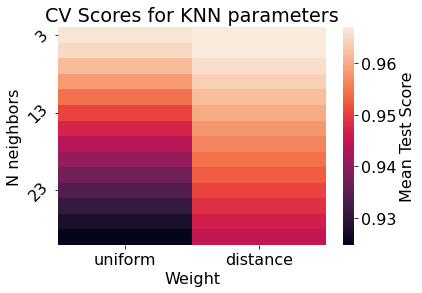

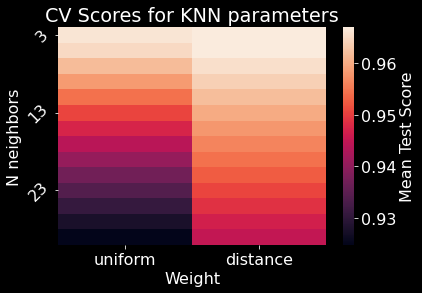

Raw data KNN optimal score = 0.968654476358329
Time taken = 109949.15331792831


In [3]:
testKNN = pKNN()